# --**Importing libraries for data importation**

In [104]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import style

style.use('ggplot')

# **--Checking for file directory**

In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ahdd1/csvTrainImages 60k x 784.csv
/kaggle/input/ahdd1/csvTestLabel 10k x 1.csv
/kaggle/input/ahdd1/csvTrainLabel 60k x 1.csv
/kaggle/input/ahdd1/Train + Test Matlab.mat
/kaggle/input/ahdd1/csvTestImages 10k x 784.csv
/kaggle/input/ahdd1/csvTrainImages 60k x 784/csvTrainImages 60k x 784.csv
/kaggle/input/ahdd1/Arabic Handwritten Digits Dataset CSV/csvTrainImages 60k x 784.csv
/kaggle/input/ahdd1/Arabic Handwritten Digits Dataset CSV/csvTestLabel 10k x 1.csv
/kaggle/input/ahdd1/Arabic Handwritten Digits Dataset CSV/csvTrainLabel 60k x 1.csv
/kaggle/input/ahdd1/Arabic Handwritten Digits Dataset CSV/csvTestImages 10k x 784.csv


In [32]:
# Load the data
X_train = pd.read_csv("../input/ahdd1/csvTrainImages 60k x 784/csvTrainImages 60k x 784.csv")
Y_train = pd.read_csv("../input/ahdd1/csvTrainLabel 60k x 1.csv")
X_test = pd.read_csv("../input/ahdd1/csvTestImages 10k x 784.csv")
y_test = pd.read_csv("../input/ahdd1/csvTestLabel 10k x 1.csv")

In [33]:
'Images in the dataset are of shape {} x {}'.format(np.sqrt(X_train.shape[1]), np.sqrt(X_train.shape[1]))

'Images in the dataset are of shape 28.0 x 28.0'

# **--appearance of each class in the dataset**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
0    5999
Name: 0, dtype: int64

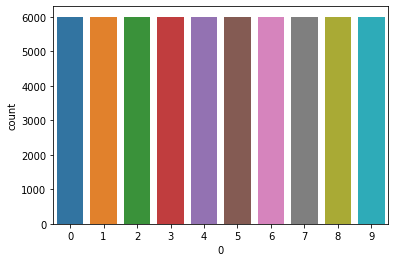

In [104]:
Y_train=Y_train.iloc[:,0]
y_test=y_test.iloc[:,0]
g = sns.countplot(Y_train)

Y_train.value_counts()

# **--Utilities**

In [25]:
def log_print(X, y, tag='Train'):
  print(f'X {tag} shape = {X.shape}')
  print(f'y {tag} shape = {y.shape}')


def norm_data(X, y):
  """
  Will also help to reshape y"""
  X_data = X / 255
  y_data = y.reshape(y.shape[0], -1)
  return X_data, y_data

def flatten(X):
  X_data = X.reshape(X.shape[0], -1)
  return X_data

def plot_images(X, y):
  plt.figure(figsize=(10,10))
  for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X[i])
    plt.title(y[i])
  plt.show()


def extract_classes(X, y, num_classes):
  X = X[np.where(y < num_classes)]
  y = y[y < num_classes]
  return X,y


def trim_data(X, y, ns):   
  X = X[:ns]
  y = y[:ns]
  return X, y

def predict(X_train, W):
  y_cat = np.zeros((X_train.shape[0],1))
  z = compute_z(X_train, W)
  y_pred = sigmoid(z)
  y_cat[y_pred > 0.5] = 1
  return y_cat
  

def accuracy(X, y, W):
  y_pred = predict(X, W)
  return sum(y == y_pred) / y.shape[0]


def hotencode(y):
  onehot_encoder = OneHotEncoder(sparse=False)
  if y.ndim != 2:
    y = y.reshape(-1, 1)
  return onehot_encoder.fit_transform(y)
def log_print(X, y, tag='Train'):
  print(f'X {tag} shape = {X.shape}')
  print(f'y {tag} shape = {y.shape}')


def plot_images(X, y):
  plt.figure(figsize=(10,10))
  for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X[i])
    plt.title(y[i])
  plt.show()

In [8]:
log_print(X_train, Y_train)
log_print(X_test, y_test)

X Train shape = (59999, 784)
y Train shape = (59999, 1)
X Train shape = (9999, 784)
y Train shape = (9999, 1)


# **--Normalizing the data**

In [40]:
X_train = X_train/255.
X_test = X_test/255.
X_train=X_train.values.reshape(-1, 28,28,1)
X_test=X_test.values.reshape(-1, 28, 28, 1)

In [41]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(y_test.shape)

(59999, 28, 28, 1)
(59999, 1)
(9999, 28, 28, 1)
(9999, 1)


# **--Data Visualization- data and sample**

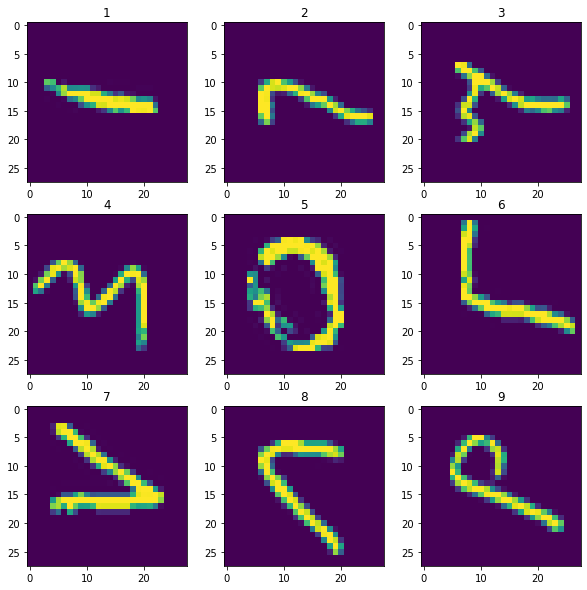

In [106]:
plot_images(X_train, Y_train)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


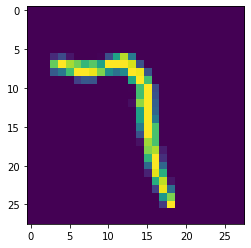

In [57]:
img_num=55                   



image = (X_train[img_num][:,:,0])
image = image.reshape([28, 28])
image = np.fliplr(image)
image = np.rot90(image)
plt.imshow(image)


print(Y_train[img_num])

In [117]:
x_train_bin, y_train_bin = extract_classes(X_train, Y_train, 2)
x_test_bin, y_test_bin = extract_classes(X_test, y_test, 2)

log_print(x_train_bin, y_train_bin)
log_print(x_test_bin, y_test_bin)

X Train shape = (599990, 28, 1)
y Train shape = (599990,)
X Train shape = (99990, 28, 1)
y Train shape = (99990,)


In [91]:
x_train_norm, y_train_norm = norm_data(x_train_bin, y_train_bin)
x_test_norm, y_test_norm = norm_data(x_test_bin, y_test_bin)

log_print(x_train_norm, y_train_norm)
log_print(x_test_norm, y_test_norm, "Test")

print("*****************************")
x_train_flat = flatten(x_train_norm)
x_test_flat = flatten(x_test_norm)

log_print(x_train_flat, y_test_norm)
log_print(x_test_flat, y_test_norm, "Test")

X Train shape = (599990, 28, 1)
y Train shape = (599990, 1)
X Test shape = (99990, 28, 1)
y Test shape = (99990, 1)
*****************************
X Train shape = (599990, 28)
y Train shape = (99990, 1)
X Test shape = (99990, 28)
y Test shape = (99990, 1)


In [92]:
ntrain_s = 500
ntest_s = 50

X_train_tr, y_train_tr = trim_data(x_train_flat, y_train_norm, ntrain_s)
X_test_tr, y_test_tr = trim_data(x_test_flat, y_test_norm, ntest_s)

log_print(X_train_tr, y_train_tr, tag='Train')
log_print(X_test_tr, y_test_tr, tag='Test')

X Train shape = (500, 28)
y Train shape = (500, 1)
X Test shape = (50, 28)
y Test shape = (50, 1)


In [93]:
class Logistic_Regression:
  def __init__(self):
    self.model_weight = None #np.zeros((1,1))

  def _init_params(self, X_train):
    """
    Zero initialize parameters using the number of features
    """
    n_features = X_train.shape[1]
    self.model_weight = np.zeros((n_features,1))
    return self.model_weight

  def _compute_z(self, X_train):
    z = np.matmul(X_train, self.model_weight)
    return z

  def _sigmoid(self, z):
    y_hat = 1 / (1 + np.exp(-z))
    return y_hat


  def _comput_cost(self, y_train, y_hat):
    loss = -(y_train * np.log(y_hat) + (1-y_train)*np.log(1-y_hat))
    cost = np.mean(loss)  
    return cost

  def _compute_gradients(self, X_train, y_train, y_hat):
    weight_grads = (1/X_train.shape[0])*(np.dot(X_train.T, (y_hat - y_train)))
    return weight_grads

  def _update_grad(self, W_grad, lr = 0.01):
    self.model_weight = self.model_weight - lr*W_grad
    assert W_grad.shape == self.model_weight.shape
    return W_grad

  def fit_classifier(self, X_train, y_train, epochs, lr = 0.01):
    self.model_weight = self._init_params(X_train)
    
    cost_list = []
    for i in range(epochs):
      z = self._compute_z(X_train)
      y_hat = self._sigmoid(z)
      cost = self._comput_cost(y_train, y_hat)
      grads = self._compute_gradients(X_train, y_train, y_hat)
      self.model_weight = self._update_grad(grads)
      cost_list.append(cost)
      print(cost)
    return cost_list

  def predict(self, X_train):
    y_cat = np.zeros((X_train.shape[0],1))
    z = self._compute_z(X_train)
    y_pred = self._sigmoid(z)
    y_cat[y_pred > 0.5] = 1
    return y_cat

In [96]:
model = Logistic_Regression()
model.model_weight

In [128]:
epochs = 500
cost_history, weights =  fit_classifier(X_train_tr, y_train_tr, epochs, lr = 0.001, verbose=True)

0.6931471805599454
0.6931465567592036
0.6931459329627025
0.6931453091704417
0.6931446853824212


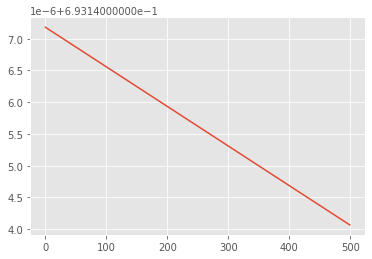

In [106]:
plt.plot(cost_history)

In [99]:
train_acc = accuracy(X_train_tr, y_train_tr, weights)
train_acc

array([0.9])

In [100]:
test_acc = accuracy(X_test_tr, y_test_tr, weights)
test_acc

array([0.9])

# **--Split data to training and validation**

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [145]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.1, random_state=4)

In [60]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(y_test.shape)

(59999, 28, 28, 1)
(59999, 10)
(9999, 28, 28, 1)
(9999, 10)


# **--importing libraries for Machine Learning**

In [14]:
import tensorflow as tf 
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import SGD,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# **--Modelling  using CNN**

In [45]:
Y_train = to_categorical(Y_train, num_classes = 10)
y_test  = to_categorical(y_test , num_classes = 10)

In [34]:
model = Sequential()

model.add(Conv2D(filters = 80, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(128, activation = "relu"))

model.add(Dropout(0.25))

model.add(Dense(10, activation = "softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 80)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 80)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 80)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        128064    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

# **--Outlook Model**

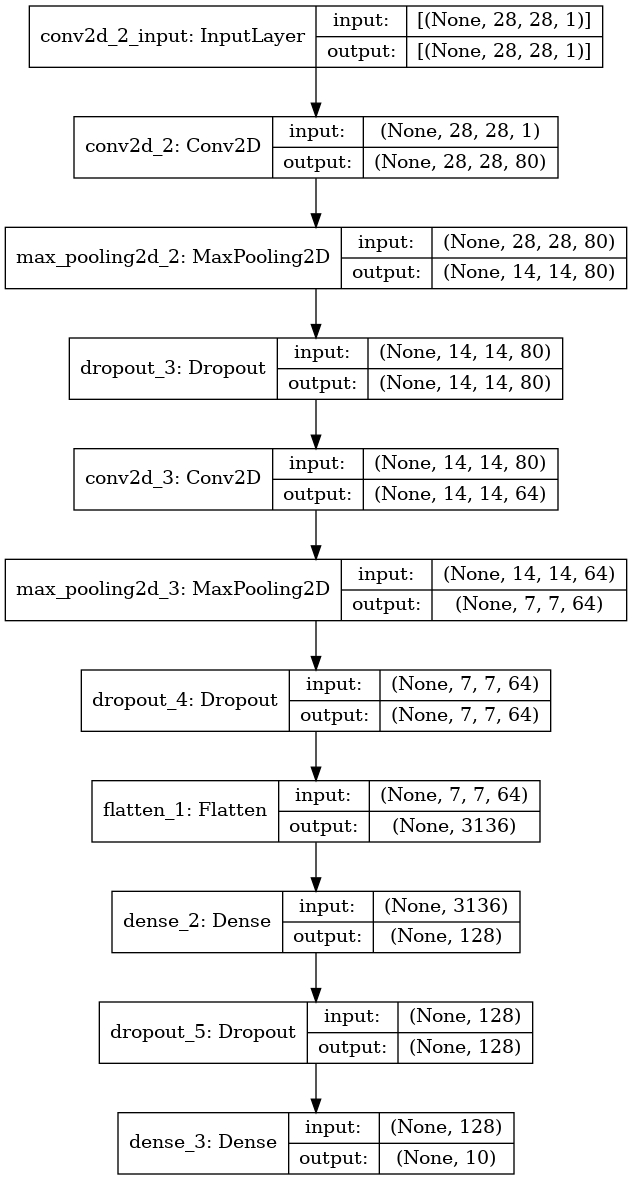

In [119]:
# print out model look
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("model.png")

# **--Define optimizer**

In [48]:
optimizer = SGD(lr=0.001, momentum=0.30)

# **--Compile the model**

In [49]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# **--Fit the model**

In [50]:
history = model.fit(
          X_train,
          Y_train,
          epochs=15,
          validation_data = (X_test, y_test),
          verbose='sigmoid'
)

Epoch 1/15
1875/1875 [==============================] - 181s 96ms/step - loss: 1.9701 - accuracy: 0.3395
Epoch 2/15
1875/1875 [==============================] - 178s 95ms/step - loss: 0.3830 - accuracy: 0.8940
Epoch 3/15
1875/1875 [==============================] - 179s 95ms/step - loss: 0.2360 - accuracy: 0.9314
Epoch 4/15
1875/1875 [==============================] - 179s 95ms/step - loss: 0.1816 - accuracy: 0.9484
Epoch 5/15
1875/1875 [==============================] - 178s 95ms/step - loss: 0.1568 - accuracy: 0.9562
Epoch 6/15
1875/1875 [==============================] - 179s 96ms/step - loss: 0.1373 - accuracy: 0.9613
Epoch 7/15
1875/1875 [==============================] - 178s 95ms/step - loss: 0.1230 - accuracy: 0.9655
Epoch 8/15
1875/1875 [==============================] - 180s 96ms/step - loss: 0.1189 - accuracy: 0.9668
Epoch 9/15
1875/1875 [==============================] - 178s 95ms/step - loss: 0.1073 - accuracy: 0.9693
Epoch 10/15
1875/1875 [==============================] 

In [102]:
history.history

{'loss': [1.4224655628204346,
  0.3281521797180176,
  0.21897223591804504,
  0.17624294757843018,
  0.15228645503520966,
  0.13377252221107483,
  0.1215514987707138,
  0.1143934428691864,
  0.10515736043453217,
  0.09987796097993851,
  0.09365518391132355,
  0.08998335897922516,
  0.08657457679510117,
  0.08037380129098892,
  0.07774966955184937],
 'accuracy': [0.5650761127471924,
  0.908315122127533,
  0.9367823004722595,
  0.9498158097267151,
  0.9572659730911255,
  0.9622493982315063,
  0.9662160873413086,
  0.9677661061286926,
  0.9701161980628967,
  0.9713995456695557,
  0.9734829068183899,
  0.9748162627220154,
  0.9756662845611572,
  0.9769996404647827,
  0.9780329465866089]}

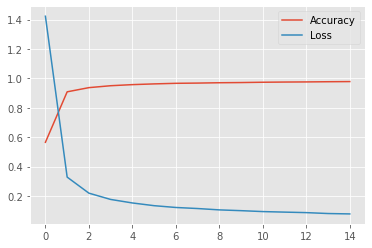

In [111]:
plt.plot(history.history['accuracy'],label='Accuracy');plt.legend()
plt.plot(history.history['loss'],label='Loss');plt.legend()

# **Graph that describe the predicted values of each class in the validation data (confusion matrix)**

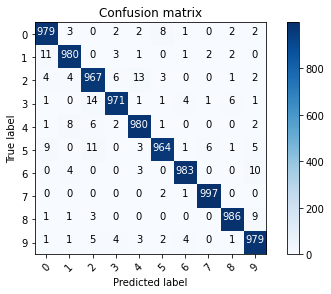

In [55]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 